# This notebook analyzes the Spec sample against galaxies with a PG template fit from autoz.

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM
from scipy import stats as sci

In [44]:
### Samples 02/15/20
spec = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_041220.csv')
#mac_121519 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_candidates_021320.csv')
#zoo_121519 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_candidates_021320.csv.csv')
spec

,Unnamed: 0,Unnamed: 0.1,RA,DEC,z1,z2,spec_type,GAMA_ID,STELLAR_MASS,max_total_mass,theta_e,Z,max_stellar_mass_salpeter,max_stellar_mass_chabrier,Dz,theta_e2,z_lens
0,0,0,138.28150,-0.66673,0.163,0.321,PG+ELG,198082,3.025000e+10,1.655791e+11,0.514681,0.1632,1.142496e+11,6.457585e+10,0.158,0.556251,0.163
1,1,1,129.69546,-0.38179,0.418,0.738,PG+ELG,202448,NaN,4.820062e+11,NaN,NaN,3.325843e+11,1.879824e+11,0.320,NaN,0.418
2,2,2,136.63883,-0.35203,0.282,0.449,PG+ELG,204140,8.578000e+10,3.790958e+11,0.572792,0.2818,2.615761e+11,1.478474e+11,0.167,0.346664,0.282
3,3,3,132.36771,0.16360,0.128,0.603,PG+ELG,209222,1.425000e+10,8.124632e+10,0.504294,0.1277,5.605996e+10,3.168606e+10,0.475,0.897134,0.128
4,4,4,132.61013,0.11972,0.313,0.608,PG+ELG,209295,8.456000e+10,3.225492e+11,0.616542,0.3126,2.225589e+11,1.257942e+11,0.295,0.417813,0.313
5,5,5,140.14187,0.97341,0.586,0.336,PG+ELG,279956,NaN,-3.937920e+11,NaN,NaN,-2.717165e+11,-1.535789e+11,0.250,NaN,0.336
6,6,6,135.32929,1.22984,0.487,0.247,PG+ELG,301818,1.215000e+11,-2.506021e+11,NaN,0.4862,-1.729154e+11,-9.773481e+10,0.240,0.677986,0.247
7,7,7,138.94058,1.33144,0.593,0.404,PG+ELG,302719,1.474000e+11,-6.337884e+11,NaN,0.5933,-4.373140e+11,-2.471775e+11,0.189,0.245262,0.404
8,8,8,130.50925,1.02071,0.077,0.699,PG+ELG,371208,4.812000e+09,4.326608e+10,0.401576,0.0767,2.985359e+10,1.687377e+10,0.622,1.110453,0.077
9,9,9,137.90642,1.62916,0.169,0.334,PG+ELG,377486,NaN,1.710485e+11,NaN,NaN,1.180235e+11,6.670891e+10,0.165,NaN,0.169


In [45]:
# Opening GAMA AATSpecAutozAll data from G09, G12, and G15 (DR3)
hdul = fits.open('/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/AATSpecAutozAll.fits')  # open a FITS file
hdul.verify('fix')
autoz_data = hdul[1].data  # assume the first extension is a table
#print(gama_data.columns)

# take ID and templates/z from first and second fit
autoz_id = autoz_data.CATAID
autoz_template1 = autoz_data.TEMPLATE
autoz_z1 = autoz_data.Z
autoz_prob = autoz_data.PROB
autoz_template2 = autoz_data.TEMPLATE2
autoz_z2 = autoz_data.Z2

#zip to list
autoz_list = list(zip(autoz_id, autoz_template1, autoz_z1, autoz_prob, autoz_template2, autoz_z2))

# create dataframe
autoz = pd.DataFrame(autoz_list, columns = ['GAMA_ID','TEMP_1','Z1','PROB','TEMP_2','Z2'])
autoz

,GAMA_ID,TEMP_1,Z1,PROB,TEMP_2,Z2
0,2305327,45,0.223963,0.999655,46,0.196395
1,2305316,44,0.152189,0.997251,46,0.510282
2,1672022,46,0.198623,0.999759,40,0.236384
3,1671853,40,0.236388,0.386042,45,0.137846
4,1671921,42,0.321190,0.873768,40,0.693042
5,1671282,47,0.140276,0.999942,47,0.143277
6,1671111,47,0.460934,0.376092,42,0.837179
7,1671361,45,0.329963,0.999964,46,0.299976
8,1670446,47,0.152914,0.959838,42,0.835282
9,1670312,44,0.224373,0.999169,47,0.605121


## Galaxy templates are 40-47 in order of increasing strength of emission lines. 40-42 are considered PG by Holwerda-15, while 43-47 are considered ELG.
## For a first pass, the GAMA PG sample will include only those whose first or second template fit is 40-42, and whose probability is > 90%

In [46]:
gama_pg = autoz[(autoz.TEMP_1 == 40) | (autoz.TEMP_2 == 40) |
                (autoz.TEMP_1 == 41) | (autoz.TEMP_2 <= 41) |
                (autoz.TEMP_1 == 42) | (autoz.TEMP_2 == 42)
                & (autoz.PROB > 0.9)]
gama_pg.drop_duplicates(subset = 'GAMA_ID',
                       keep = 'first',
                        inplace = True)
gama_pg

/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,GAMA_ID,TEMP_1,Z1,PROB,TEMP_2,Z2
2,1672022,46,0.198623,0.999759,40,0.236384
3,1671853,40,0.236388,0.386042,45,0.137846
4,1671921,42,0.321190,0.873768,40,0.693042
8,1670446,47,0.152914,0.959838,42,0.835282
11,1097325,40,0.253010,1.000000,43,0.800070
13,1095842,40,0.195227,1.000000,42,0.791132
14,1669081,45,0.153621,0.988831,40,0.392921
15,1093407,40,0.342124,0.999953,46,0.331020
18,1668679,42,0.333373,0.999481,47,0.277775
19,1093536,40,0.304203,1.000000,43,0.872627


In [76]:
#gama_pg['z_lens'] = np.zeros(len(gama_pg))
#gama_pg.reset_index(inplace = True)

In [81]:
#for i in range(len(gama_pg.z_lens)):
 #   if gama_pg.Z1[i] > gama_pg.Z2[i]:
  #      gama_pg.z_lens[i] = gama_pg.Z2[i]
   # else:
    #    gama_pg.z_lens[i] = gama_pg.Z1[i]
     #   print('meeeseeeks')


#for i in range(len(gama_pg)):
 #   if gama_pg.Z1[i] > gama_pg.Z2[i]:
  #      gama_pg['z_lens'][i] = gama_pg.Z2[i]
   # else:
    #    gama_pg['z_lens'][i] = gama_pg.Z1[i]
    #print('heyoo')

## Load in MagPhys to combine M* and z

In [8]:
# Opening GAMA MagPhys data from G09, G12, and G15 (DR3)
hdul = fits.open('/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/MagPhys.fits')  # open a FITS file
hdul.verify('fix')
magphys_data = hdul[1].data  # assume the first extension is a table
#print(gama_data.columns)

# take ID and templates/z from first and second fit
magphys_id = magphys_data.CATAID
magphys_mass = magphys_data.mass_stellar_best_fit
magphys_z = magphys_data.Z

#zip to list
magphys_list = list(zip(magphys_id, magphys_mass, magphys_z))

# create dataframe
magphys = pd.DataFrame(magphys_list, columns = ['GAMA_ID','STELLAR_MASS','Z'])
magphys

,GAMA_ID,STELLAR_MASS,Z
0,6802,1.117000e+09,0.0505
1,6806,8.560000e+10,0.3312
2,6808,5.503000e+10,0.2294
3,6810,1.204000e+11,0.3263
4,6813,1.025000e+11,0.4846
5,6816,2.230000e+09,0.0764
6,6820,8.074000e+10,0.4141
7,6821,3.167000e+07,0.0038
8,6826,5.397000e+09,0.0728
9,6830,3.006000e+09,0.1140


## Merge gama_pg and magphys to have stellar mass and z of all PG. Keep those whose MagPhys z matches one of the autoz z within 0.01.

In [9]:
pg_sample = pd.merge(gama_pg, magphys, on = 'GAMA_ID', how = 'inner')

pg_sample1 = pg_sample[(abs(pg_sample.z_1 - pg_sample.Z) < 0.01)]
pg_sample1 = pg_sample1[(pg_sample1.TEMP_1 == 40) |
                       (pg_sample1.TEMP_1 == 41) |
                       (pg_sample1.TEMP_1 == 42) ]
pg_sample1
pg_sample2 = pg_sample[(abs(pg_sample.Z2 - pg_sample.Z) < 0.01)]
pg_sample2 = pg_sample2[(pg_sample2.TEMP_1 == 40) |
                       (pg_sample2.TEMP_1 == 41) |
                       (pg_sample2.TEMP_1 == 42)]
pg_sample2
pg = pd.concat([pg_sample1, pg_sample2])
pg

,GAMA_ID,TEMP_1,Z1,PROB,TEMP_2,Z2,STELLAR_MASS,Z
0,375611,40,0.208838,1.000000,12,-0.001423,1.682000e+11,0.2088
1,300625,42,0.296332,0.986496,43,0.223840,1.209000e+11,0.2964
2,300609,40,0.112758,0.999998,42,0.835271,5.191000e+10,0.1128
3,375659,40,0.147295,1.000000,47,0.554020,2.662000e+10,0.1473
4,300656,42,0.110471,1.000000,43,0.135040,2.333000e+10,0.1105
5,300593,40,0.110415,1.000000,47,0.228428,5.494000e+10,0.1104
6,300619,40,0.085224,1.000000,43,0.611302,7.048000e+10,0.0854
7,300562,40,0.270003,1.000000,47,0.012132,6.144000e+10,0.2700
8,375554,40,0.201338,0.999998,47,0.328055,8.015000e+10,0.2013
9,300506,40,0.153009,1.000000,46,0.515986,4.220000e+10,0.1530


## Plot pg z to log(M*)

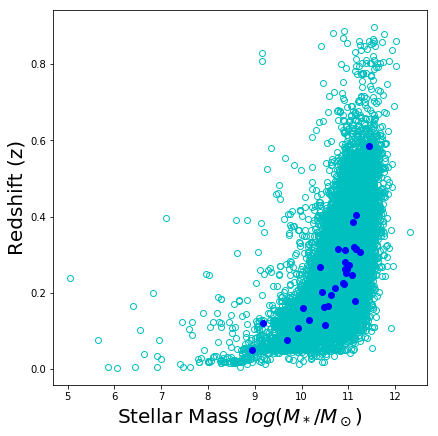

In [10]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
#rect_histx = [left, lower_h, width, 0.2]
#rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
#axHistx = plt.axes(rect_histx)
#axHisty = plt.axes(rect_histy)

binwidth = 0.5
bins=20

    # no labels
#axHistx.xaxis.set_major_formatter(nullfmt)
#axHisty.yaxis.set_major_formatter(nullfmt)

axScatter.plot(np.log10(pg.STELLAR_MASS), pg.Z, 'co', fillstyle = 'none')
axScatter.plot(np.log10(spec.STELLAR_MASS), spec.z_lens, 'bo')

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)

#axHisty.hist(spec.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='b', histtype = 'step', linewidth=3)
#axHisty.hist(pg_sample.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='c', histtype = 'step', linewidth=3)

#axHistx.hist(np.log10(spec.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
#axHistx.hist(np.log10(pg_sample.STELLAR_MASS), range=[7,12], bins=bins,color='c', histtype = 'step', linewidth=3)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/spec_gama_pg_zmass.png')

# K-S tests of z and M*

In [13]:
sci.ks_2samp(spec.z_lens, pg.Z)

Ks_2sampResult(statistic=0.08448874295917952, pvalue=0.8767734340912922)

In [12]:
sci.ks_2samp(spec.STELLAR_MASS, pg.STELLAR_MASS)

Ks_2sampResult(statistic=0.34042553191489366, pvalue=2.4334275388149938e-05)

# AD tests of z and M*

In [55]:
sci.anderson_ksamp([spec.Z, pg.Z])

/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: p-value floored: true value smaller than 0.001
  """Entry point for launching an IPython kernel.


Anderson_ksampResult(statistic=177.37253002455355, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

In [54]:
sci.anderson_ksamp([spec.STELLAR_MASS, pg.STELLAR_MASS])

/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: p-value floored: true value smaller than 0.001
  """Entry point for launching an IPython kernel.


Anderson_ksampResult(statistic=161.47716684141713, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)